In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'amazon_alexa.tsv' , sep = '\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [4]:
data.shape

(3150, 5)

In [5]:
data['Length'] = data['verified_reviews'].apply(lambda x : len(x.split()))
data.head()

,rating,date,variation,verified_reviews,feedback,Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,2
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34
4,5,31-Jul-18,Charcoal Fabric,Music,1,1


In [7]:
data['date']= pd.to_datetime(data['date'])
data.head()

,rating,date,variation,verified_reviews,feedback,Length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,3
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,2
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34
4,5,2018-07-31,Charcoal Fabric,Music,1,1


In [8]:
data['date'].dt.month.value_counts()

7    2913
6     155
5      82
Name: date, dtype: int64

In [9]:
data.drop('date' , axis = 1 ,inplace = True)

In [10]:
data.head()

,rating,variation,verified_reviews,feedback,Length
0,5,Charcoal Fabric,Love my Echo!,1,3
1,5,Charcoal Fabric,Loved it!,1,2
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34
4,5,Charcoal Fabric,Music,1,1


In [11]:
data['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [12]:
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [13]:
data['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
freq = data['variation'].value_counts()
freq

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

<AxesSubplot:>

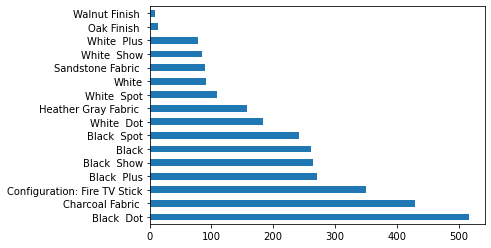

In [17]:
freq.plot(kind = 'barh')

In [18]:
from nltk.corpus import stopwords
import string

In [19]:
stopword = stopwords.words('english')
punc = string.punctuation + '’'
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’'

In [20]:
data.rename(columns = {'verified_reviews':'review'} , inplace = True)
data.head()

,rating,variation,review,feedback,Length
0,5,Charcoal Fabric,Love my Echo!,1,3
1,5,Charcoal Fabric,Loved it!,1,2
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34
4,5,Charcoal Fabric,Music,1,1


In [21]:
from gensim.models.phrases import Phrases, Phraser
import re

In [22]:
def clean(line):
    words = line.split()
    words = [word for word in words if (word not in stopword) and (not word.isdigit())]
    line = ' '.join(words).lower()
    line = [word for word in line if (word not in punc) and (not word.isdigit())]
    line = ''.join(line)
    pat= r'[^a-zA-Z0-9]'
    return re.sub(pat , ' ' , line)


In [24]:
data['clean_review'] = data['review'].apply(clean)
data.head()

,rating,variation,review,feedback,Length,clean_review
0,5,Charcoal Fabric,Love my Echo!,1,3,love echo
1,5,Charcoal Fabric,Loved it!,1,2,loved it
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38,sometimes playing game answer question correct...
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34,i lot fun thing my yr old learns dinosaurs con...
4,5,Charcoal Fabric,Music,1,1,music


In [25]:
data['clean_review'] = data['clean_review'].apply(lambda x:x.split())
data.head()

,rating,variation,review,feedback,Length,clean_review
0,5,Charcoal Fabric,Love my Echo!,1,3,"[love, echo]"
1,5,Charcoal Fabric,Loved it!,1,2,"[loved, it]"
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38,"[sometimes, playing, game, answer, question, c..."
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34,"[i, lot, fun, thing, my, yr, old, learns, dino..."
4,5,Charcoal Fabric,Music,1,1,[music]


In [26]:
phrases = Phrases(sentences = data['clean_review'] , threshold = 0.7 , delimiter = ' ')
phrases.vocab

{'love': 951,
 'echo': 826,
 'love echo': 105,
 'loved': 42,
 'it': 882,
 'loved it': 12,
 'sometimes': 37,
 'playing': 69,
 'sometimes playing': 1,
 'game': 2,
 'playing game': 1,
 'answer': 32,
 'game answer': 1,
 'question': 15,
 'answer question': 4,
 'correctly': 10,
 'question correctly': 1,
 'alexa': 613,
 'correctly alexa': 1,
 'says': 25,
 'alexa says': 1,
 'got': 133,
 'says got': 1,
 'wrong': 15,
 'got wrong': 1,
 'answers': 19,
 'wrong answers': 1,
 'you': 80,
 'answers you': 1,
 'i': 2845,
 'you i': 1,
 'like': 501,
 'i like': 147,
 'able': 107,
 'like able': 9,
 'turn': 94,
 'able turn': 2,
 'lights': 96,
 'turn lights': 23,
 'away': 29,
 'lights away': 2,
 'home': 215,
 'away home': 3,
 'lot': 77,
 'i lot': 1,
 'fun': 150,
 'lot fun': 11,
 'thing': 127,
 'fun thing': 1,
 'my': 112,
 'thing my': 1,
 'yr': 3,
 'my yr': 1,
 'old': 49,
 'yr old': 3,
 'learns': 8,
 'old learns': 1,
 'dinosaurs': 1,
 'learns dinosaurs': 1,
 'control': 75,
 'dinosaurs control': 1,
 'control lig

In [27]:
phraser = Phraser(phrases)

In [28]:
list(phraser[data['clean_review'].iloc[0]])

['love echo']

In [30]:
def fit_phrase(line):
    return list(phraser[line])

In [31]:
data['phrase_review'] = data['clean_review'].apply(fit_phrase)

In [32]:
fit_phrase(data['clean_review'].iloc[3])

['i',
 'lot fun',
 'thing',
 'my',
 'yr',
 'old',
 'learns',
 'dinosaurs',
 'control lights',
 'play games',
 'like',
 'categories',
 'has',
 'nice sound',
 'playing music',
 'well']

In [33]:
data.head()

,rating,variation,review,feedback,Length,clean_review,phrase_review
0,5,Charcoal Fabric,Love my Echo!,1,3,"[love, echo]",[love echo]
1,5,Charcoal Fabric,Loved it!,1,2,"[loved, it]",[loved it]
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38,"[sometimes, playing, game, answer, question, c...","[sometimes, playing, game, answer, question, c..."
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34,"[i, lot, fun, thing, my, yr, old, learns, dino...","[i, lot fun, thing, my, yr, old, learns, dinos..."
4,5,Charcoal Fabric,Music,1,1,[music],[music]


In [34]:
data['clean_review'] = data['clean_review'].apply(lambda x:' '.join(x))
data.head()

,rating,variation,review,feedback,Length,clean_review,phrase_review
0,5,Charcoal Fabric,Love my Echo!,1,3,love echo,[love echo]
1,5,Charcoal Fabric,Loved it!,1,2,loved it,[loved it]
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38,sometimes playing game answer question correct...,"[sometimes, playing, game, answer, question, c..."
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34,i lot fun thing my yr old learns dinosaurs con...,"[i, lot fun, thing, my, yr, old, learns, dinos..."
4,5,Charcoal Fabric,Music,1,1,music,[music]


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv = CountVectorizer(ngram_range = (2,2))

In [37]:
vectors = cv.fit_transform(data['clean_review'])

In [38]:
keys = [k for k,v in sorted(cv.vocabulary_.items() , key = lambda item:item[1])]
len(keys)

24625

In [39]:
sum_tf = np.sum(vectors , axis = 0)

In [40]:
vector_df = pd.DataFrame(sum_tf , columns = keys).T
vector_df.columns = ['count']
vector_df = vector_df.reset_index()
vector_df.columns = ['word','count']
vector_df.head()

,word,count
0,abay monitor,1
1,abc days,1
2,abd start,1
3,abilities alexa,1
4,abilities got,1


In [41]:
line = 'i lot fun thing my yr old learns dinosaurs control lights play games like categories has nice sound playing music like well'

In [42]:
indices = cv.transform([line]).indices
values = cv.transform([line]).data
indices.shape , values.shape

((20,), (20,))

In [43]:
cv_line = pd.DataFrame([indices,values]).T
cv_line.columns = ['indices' , 'values']
cv_line.head()

,indices,values
0,3303,1
1,4089,1
2,5158,1
3,7728,1
4,7822,1


In [44]:
cv_df = pd.DataFrame(cv.vocabulary_.items()).sort_values(by = 1).set_index(1 , drop = True)
cv_df.columns = ['word']
cv_df.head()

,word
1,
0,abay monitor
1,abc days
2,abd start
3,abilities alexa
4,abilities got


In [45]:
cv_vector = cv_df.merge(vector_df , on = 'word')
cv_vector.sort_values('count' , ascending =False)
cv_vector.head()

,word,count
0,abay monitor,1
1,abc days,1
2,abd start,1
3,abilities alexa,1
4,abilities got,1


In [46]:
line

'i lot fun thing my yr old learns dinosaurs control lights play games like categories has nice sound playing music like well'

In [47]:
c_v  = cv_vector[['word']].iloc[cv_line['indices'].values]
c_v.index = range(0,20)
c_v['values'] = cv_line['values']
c_v.sort_values(by = 'values' , ascending = False)

,word,values
0,categories has,1
1,control lights,1
18,thing my,1
17,sound playing,1
16,playing music,1
15,play games,1
14,old learns,1
13,nice sound,1
12,my yr,1
11,music like,1


In [48]:
def final(line):
    indices = cv.transform([line]).indices
    values = cv.transform([line]).data
    cv_line = pd.DataFrame([indices,values]).T
    cv_line.columns = ['indices' , 'values']
    c_v  = cv_vector[['word']].iloc[cv_line['indices'].values]
    c_v.index = range(0,len(cv_line['indices']))
    c_v['values'] = cv_line['values']
    return c_v.sort_values(by = 'values' , ascending = False)

In [184]:
line2 = data['clean_review'].sample().values[0]
print(line2)
final(line2)

easy set up lots things watch program in have even gotten far yet easy use highly recommended leaning closer cutting cable cord good


,word,values
0,cable cord,1
1,closer cutting,1
20,watch program,1
19,use highly,1
18,up lots,1
17,things watch,1
16,set up,1
15,recommended leaning,1
14,program in,1
13,lots things,1


In [50]:
from wordcloud import WordCloud

In [53]:
word_freq = dict([[word,sum_tf[0,idx]] for word,idx in cv.vocabulary_.items()])
word_freq

{'love echo': 105,
 'loved it': 12,
 'sometimes playing': 1,
 'playing game': 1,
 'game answer': 1,
 'answer question': 4,
 'question correctly': 1,
 'correctly alexa': 1,
 'alexa says': 1,
 'says got': 1,
 'got wrong': 1,
 'wrong answers': 1,
 'answers you': 1,
 'you like': 1,
 'like able': 10,
 'able turn': 2,
 'turn lights': 23,
 'lights away': 2,
 'away home': 3,
 'lot fun': 11,
 'fun thing': 1,
 'thing my': 1,
 'my yr': 1,
 'yr old': 3,
 'old learns': 1,
 'learns dinosaurs': 1,
 'dinosaurs control': 1,
 'control lights': 7,
 'lights play': 1,
 'play games': 11,
 'games like': 6,
 'like categories': 1,
 'categories has': 1,
 'has nice': 1,
 'nice sound': 8,
 'sound playing': 1,
 'playing music': 39,
 'music well': 2,
 'received echo': 7,
 'echo gift': 3,
 'gift needed': 2,
 'needed another': 2,
 'another bluetooth': 2,
 'bluetooth something': 2,
 'something play': 2,
 'play music': 81,
 'music easily': 4,
 'easily accessible': 2,
 'accessible found': 2,
 'found smart': 2,
 'smart s

In [54]:
word_freq = sorted(word_freq.items() , key = lambda x:x[1] , reverse=True)

In [55]:
wc = WordCloud(background_color = 'lightgreen' , width=2000,height=2000).generate_from_frequencies(dict(word_freq))

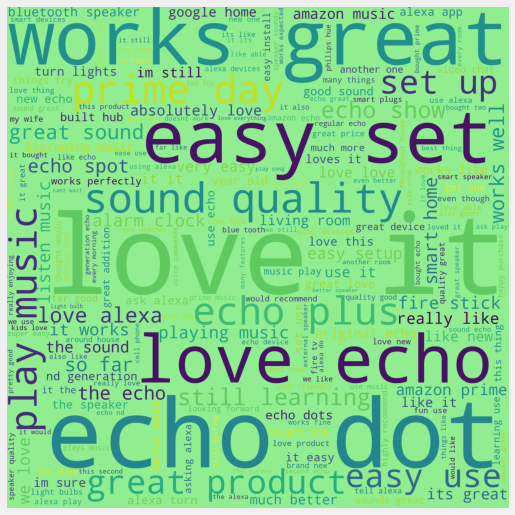

In [56]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
data.head()

,rating,variation,review,feedback,Length,clean_review,phrase_review
0,5,Charcoal Fabric,Love my Echo!,1,3,love echo,[love echo]
1,5,Charcoal Fabric,Loved it!,1,2,loved it,[loved it]
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38,sometimes playing game answer question correct...,"[sometimes, playing, game, answer, question, c..."
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34,i lot fun thing my yr old learns dinosaurs con...,"[i, lot fun, thing, my, yr, old, learns, dinos..."
4,5,Charcoal Fabric,Music,1,1,music,[music]


In [59]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [60]:
tfidf_vectors = tfidf.fit_transform(data['clean_review'])

In [72]:
tf_vocab = pd.DataFrame(tfidf.vocabulary_ , index= [0]).T.sort_values(by=0).reset_index().drop(0 , axis = 1)
tf_vocab.columns =   ['word']
tf_vocab.head()

,word
0,abay
1,abc
2,abd
3,abilities
4,ability


In [105]:
tf_df = pd.DataFrame(tfidf_vectors.sum(axis = 0), columns = tf_vocab['word']).T.reset_index()
tf_df.columns = ['word','tf_orig']
tf_df.head()

,word,tf
0,abay,0.230176
1,abc,0.246405
2,abd,0.406023
3,abilities,0.630345
4,ability,5.907149


In [ ]:
def final(line):
    indices = cv.transform([line]).indices
    values = cv.transform([line]).data
    cv_line = pd.DataFrame([indices,values]).T
    cv_line.columns = ['indices' , 'values']
    c_v  = cv_vector[['word']].iloc[cv_line['indices'].values]
    c_v.index = range(0,len(cv_line['indices']))
    c_v['values'] = cv_line['values']
    return c_v.sort_values(by = 'values' , ascending = False)

In [106]:
line

'i lot fun thing my yr old learns dinosaurs control lights play games like categories has nice sound playing music like well'

In [131]:
values= tfidf.transform([line]).data
indices = tfidf.transform([line]).indices
vectors_line = tfidf.transform([line]).data

array([0.33556727, 0.18602363, 0.14593106, 0.21635249, 0.16949452,
       0.22683945, 0.19837279, 0.12833351, 0.20789935, 0.26099426,
       0.20031779, 0.30008478, 0.24740459, 0.17969054, 0.36589613,
       0.21425183, 0.36589613])

In [160]:
tf_line = pd.DataFrame([values.tolist(),indices.tolist()] ,index = ['tf_line','index']).T
tf_line

,tf_line,index
0,0.335567,4047.0
1,0.186024,3601.0
2,0.145931,3301.0
3,0.216352,2604.0
4,0.169495,2601.0
5,0.226839,2407.0
6,0.198373,2338.0
7,0.128334,2278.0
8,0.207899,2105.0
9,0.260994,2036.0


In [188]:
line_df = tf_df.iloc[tf_line['index']].reset_index()
# line_df = line_df.reset_index()
line_df

,index,word,tf_orig
0,4047,yr,0.905126
1,3601,thing,27.723036
2,3301,sound,69.705228
3,2604,playing,13.496318
4,2601,play,34.525879
5,2407,old,10.898281
6,2338,nice,28.855510
7,2278,music,77.596376
8,2105,lot,16.364124
9,2036,like,96.632693


In [185]:
line_df.merge(tf_line , how = 'left' , on=['index'])[['word','tf_orig','tf_line']]

,word,tf_orig,tf_line
0,yr,0.905126,0.335567
1,thing,27.723036,0.186024
2,sound,69.705228,0.145931
3,playing,13.496318,0.216352
4,play,34.525879,0.169495
5,old,10.898281,0.226839
6,nice,28.855510,0.198373
7,music,77.596376,0.128334
8,lot,16.364124,0.207899
9,like,96.632693,0.260994


In [196]:
def tf(line):
    values= tfidf.transform([line]).data
    indices = tfidf.transform([line]).indices
    vectors_line = tfidf.transform([line]).data
    tf_line = pd.DataFrame([values.tolist(),indices.tolist()] ,index = ['tf_line','index']).T
    line_df = tf_df.iloc[tf_line['index']].reset_index()
    return line_df.merge(tf_line , how = 'left' , on=['index'])[['word','tf_orig','tf_line']].sort_values(by='tf_line',ascending=False)

In [197]:
sample_text = data['clean_review'].sample().values[0]
print(sample_text)
tf(sample_text)

it wont work blue tooth speaker tvit connects wont work


,word,tf_orig,tf_line
1,wont,3.626876,0.613491
0,work,29.728159,0.395406
2,tvit,0.760778,0.380389
5,connects,2.038924,0.333499
3,tooth,3.235766,0.306746
6,blue,4.081036,0.292147
4,speaker,46.874497,0.178669


In [212]:
sum_tf = np.sum(tfidf_vectors , axis = 0)

In [213]:
words_freq = [(word , sum_tf[0,idx]) for word , idx in tfidf.vocabulary_.items()]
words_freq

[('love', 253.37856817736937),
 ('echo', 112.21664614575546),
 ('loved', 15.50274460600924),
 ('playing', 13.496318321058698),
 ('game', 0.7958471513269011),
 ('answer', 7.853823885879801),
 ('question', 3.6671244251890447),
 ('correctly', 1.9515468155205125),
 ('alexa', 85.88628526748484),
 ('says', 6.248127073294307),
 ('got', 26.374925391597905),
 ('wrong', 3.68459875492793),
 ('answers', 4.140902877282584),
 ('like', 96.63269317721159),
 ('able', 23.24079924045372),
 ('turn', 15.22430529149094),
 ('lights', 15.721088041900614),
 ('away', 6.034701003715907),
 ('home', 39.230612853213984),
 ('lot', 16.36412363959377),
 ('fun', 41.13595587275414),
 ('thing', 27.72303569209429),
 ('yr', 0.9051255801593434),
 ('old', 10.898281221810969),
 ('learns', 1.694301052124479),
 ('dinosaurs', 0.3756167590896535),
 ('control', 13.591729678305619),
 ('play', 34.52587884165105),
 ('games', 7.263824264347905),
 ('categories', 0.3756167590896535),
 ('nice', 28.85551029274999),
 ('sound', 69.705228217

In [220]:
words_freq = sorted(words_freq , key = lambda x:x[1] , reverse = True)
words_freq

[('love', 253.37856817736937),
 ('great', 164.64014683872907),
 ('echo', 112.21664614575546),
 ('works', 105.74440915967259),
 ('like', 96.63269317721159),
 ('easy', 92.93968770384197),
 ('use', 88.4427602757139),
 ('alexa', 85.88628526748484),
 ('music', 77.5963764329238),
 ('product', 77.15818927788477),
 ('sound', 69.70522821748263),
 ('good', 68.6019785336522),
 ('set', 68.28795024774695),
 ('dot', 51.68728465695521),
 ('speaker', 46.87449675275639),
 ('new', 42.073293256595456),
 ('fun', 41.13595587275414),
 ('really', 40.0825977890141),
 ('device', 39.84908889781532),
 ('better', 39.51666961139029),
 ('quality', 39.379830026139075),
 ('home', 39.230612853213984),
 ('bought', 38.93779436600054),
 ('im', 37.04416441013114),
 ('far', 36.782207712049406),
 ('time', 35.32332816319411),
 ('play', 34.52587884165105),
 ('amazon', 34.08750131798098),
 ('smart', 33.41783021187116),
 ('learning', 33.046700210406875),
 ('work', 29.72815889243593),
 ('awesome', 29.68493693462091),
 ('prime', 

In [217]:
wordcloud = WordCloud(background_color='lightblue' , width = 2000 , height = 2000).generate_from_frequencies(dict(words_freq))

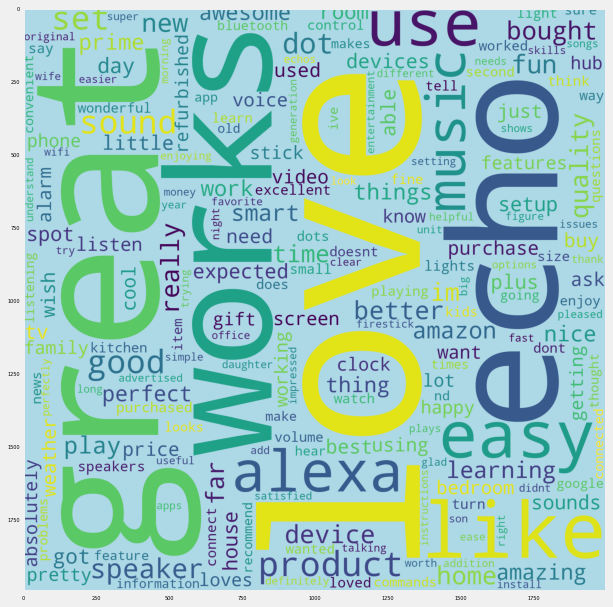

In [219]:
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5

plt.grid(False)

plt.imshow(wordcloud)

In [221]:
from sklearn.model_selection import train_test_split

In [315]:
from textblob import TextBlob

def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    if pol>0.3:
        return 1
    elif pol <-0.3:
        return 0
    else:
        return 0.5

In [316]:
data['polarity'] = data['clean_review'].apply(get_polarity)
data.head()

,rating,variation,review,feedback,Length,clean_review,phrase_review,polarity
0,5,Charcoal Fabric,Love my Echo!,1,3,love echo,[love echo],1.0
1,5,Charcoal Fabric,Loved it!,1,2,loved it,[loved it],1.0
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38,sometimes playing game answer question correct...,"[sometimes, playing, game, answer, question, c...",0.5
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34,i lot fun thing my yr old learns dinosaurs con...,"[i, lot fun, thing, my, yr, old, learns, dinos...",1.0
4,5,Charcoal Fabric,Music,1,1,music,[music],0.5


In [328]:
def get_target(data):
    return np.where((data['polarity']*data['rating'])>3,1,0)

In [332]:
data['target'] = np.where((data['polarity']*data['rating'])>3,1,0)

In [333]:
data.head()

,rating,variation,review,feedback,Length,clean_review,phrase_review,polarity,target
0,5,Charcoal Fabric,Love my Echo!,1,3,love echo,[love echo],1.0,1
1,5,Charcoal Fabric,Loved it!,1,2,loved it,[loved it],1.0,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38,sometimes playing game answer question correct...,"[sometimes, playing, game, answer, question, c...",0.5,0
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34,i lot fun thing my yr old learns dinosaurs con...,"[i, lot fun, thing, my, yr, old, learns, dinos...",1.0,1
4,5,Charcoal Fabric,Music,1,1,music,[music],0.5,0


In [334]:
x = data['clean_review']
y = data['target']

In [335]:
X_Train , X_Test , Y_Train , Y_Test = train_test_split(x , y , test_size = 0.1 , random_state = 42)

In [339]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [341]:
X_train = tfidf.fit_transform(X_Train).toarray()
X_test = tfidf.transform(X_Test).toarray()

In [343]:
from sklearn.neural_network import MLPClassifier

In [344]:
MLP = MLPClassifier( # 300 neurons 1 layer , (300,3) = 3 layers
    hidden_layer_sizes = (300,)  , activation = 'relu' , verbose = 1 , solver = 'adam',
                   batch_size = 32 , learning_rate = 'constant' , learning_rate_init = 0.001 , max_iter = 100)

In [346]:
MLP.fit(X_train , Y_Train)

Iteration 1, loss = 0.58904257
Iteration 2, loss = 0.29462919
Iteration 3, loss = 0.15113351
Iteration 4, loss = 0.09034403
Iteration 5, loss = 0.06102058
Iteration 6, loss = 0.04413575
Iteration 7, loss = 0.03404207
Iteration 8, loss = 0.02768125
Iteration 9, loss = 0.02326760
Iteration 10, loss = 0.02027514
Iteration 11, loss = 0.01774823
Iteration 12, loss = 0.01591820
Iteration 13, loss = 0.01392526
Iteration 14, loss = 0.01268014
Iteration 15, loss = 0.01147540
Iteration 16, loss = 0.01075020
Iteration 17, loss = 0.01012037
Iteration 18, loss = 0.00967771
Iteration 19, loss = 0.00902822
Iteration 20, loss = 0.00858851
Iteration 21, loss = 0.00838009
Iteration 22, loss = 0.00801940
Iteration 23, loss = 0.00760099
Iteration 24, loss = 0.00738550
Iteration 25, loss = 0.00722171
Iteration 26, loss = 0.00704945
Iteration 27, loss = 0.00684684
Iteration 28, loss = 0.00677632
Iteration 29, loss = 0.00676360
Iteration 30, loss = 0.00661809
Iteration 31, loss = 0.00633911
Iteration 32, los

MLPClassifier(batch_size=32, hidden_layer_sizes=(300,), max_iter=100, verbose=1)

In [347]:
MLP.score(X_test , Y_Test)

0.9111111111111111

In [348]:
from sklearn.svm import SVC

In [349]:
svc = SVC()
svc.fit(X_train , Y_Train)

SVC()

In [350]:
svc.score(X_test , Y_Test)

0.9206349206349206

In [353]:
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

In [354]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [355]:
print(classification_report(Y_Train , y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1312
           1       0.99      1.00      1.00      1523

    accuracy                           1.00      2835
   macro avg       1.00      0.99      1.00      2835
weighted avg       1.00      1.00      1.00      2835



In [357]:
print(classification_report(Y_Test , y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       143
           1       0.93      0.92      0.93       172

    accuracy                           0.92       315
   macro avg       0.92      0.92      0.92       315
weighted avg       0.92      0.92      0.92       315



In [371]:
mlp_test_pred = MLP.predict(X_test)

In [372]:
print(classification_report(Y_Test , mlp_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       143
           1       0.92      0.92      0.92       172

    accuracy                           0.91       315
   macro avg       0.91      0.91      0.91       315
weighted avg       0.91      0.91      0.91       315



In [373]:
confusion_matrix(Y_Test , y_test_pred)

array([[131,  12],
       [ 13, 159]], dtype=int64)

In [374]:
confusion_matrix(Y_Test , mlp_test_pred)

array([[129,  14],
       [ 14, 158]], dtype=int64)

In [378]:
from scipy.spatial.distance import euclidean
from scipy.sparse import isspmatrix
import random

In [534]:
def linguistic_distance(x,y,sample,n):
    x_sample = x[sample]
    if isspmatrix(x_sample):
        x_sample = x_sample.todense()
    holder = []
    
    for i in range(len(x)):
        if i!=sample:
            x_test = x[i]
            
            if isspmatrix(x_test):
                x_test = x_test.todense()
                
            distance = euclidean(x_sample ,x_test)
            holder.append([i,distance])
    df = pd.DataFrame(holder , columns = ['index','distance']).sort_values(by='distance',ascending=True)
    df = df.head(n)
    y_sample =  y[sample]
    y_closest = [y[index] for index in df['index'].values]
            
    return y_sample,y_closest

In [473]:
cv = CountVectorizer(ngram_range = (1,1))
vectors = cv.fit_transform(data['clean_review'])

In [477]:
sample = random.randint(0,len(data))
x = vectors
y = data['target'].values
n = 10
sample

2971

In [478]:
y_sample,y_closest,df_ling = linguistic_distance(x,y,sample,n)

In [479]:
y_sample,  y_closest

(1, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [468]:
df_ling

,index,distance
44,44,4.123106
1801,1802,4.123106
1018,1018,4.123106
2459,2460,4.123106
2418,2419,4.123106
2810,2811,4.123106
445,445,4.123106
739,739,4.123106
2096,2097,4.123106
2113,2114,4.123106


In [437]:
data['clean_review'].iloc[sample]

'this thing great internet amazon prime'

In [442]:
data[['clean_review' , 'target']].iloc[df_ling['index']]

,clean_review,target
2097,great,1
44,great,1
2419,great,1
739,great,1
445,great,1
2811,great,1
1802,great,1
1018,great,1
1303,great,1
2460,great,1


In [482]:
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
import gensim

In [490]:
def split(line):
    return line.split()

data['clean_split'] = data['clean_review'].apply(split)
data.head()

,rating,variation,review,feedback,Length,clean_review,phrase_review,polarity,target,clean_split
0,5,Charcoal Fabric,Love my Echo!,1,3,love echo,[love echo],1.0,1,"[love, echo]"
1,5,Charcoal Fabric,Loved it!,1,2,loved it,[loved it],1.0,1,"[loved, it]"
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38,sometimes playing game answer question correct...,"[sometimes, playing, game, answer, question, c...",0.5,0,"[sometimes, playing, game, answer, question, c..."
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34,i lot fun thing my yr old learns dinosaurs con...,"[i, lot fun, thing, my, yr, old, learns, dinos...",1.0,1,"[i, lot, fun, thing, my, yr, old, learns, dino..."
4,5,Charcoal Fabric,Music,1,1,music,[music],0.5,0,[music]


In [545]:
w2v = Word2Vec(sentences = data['clean_split'],workers = 10 , sg = 1)

In [546]:
wv_vocab = w2v.wv.key_to_index
wv_vocab

{'i': 0,
 'love': 1,
 'it': 2,
 'echo': 3,
 'great': 4,
 'alexa': 5,
 'music': 6,
 'like': 7,
 'use': 8,
 'works': 9,
 'the': 10,
 'one': 11,
 'easy': 12,
 'sound': 13,
 'set': 14,
 'dot': 15,
 'good': 16,
 'amazon': 17,
 'product': 18,
 'get': 19,
 'this': 20,
 'speaker': 21,
 'im': 22,
 'its': 23,
 'would': 24,
 'home': 25,
 'play': 26,
 'device': 27,
 'still': 28,
 'time': 29,
 'really': 30,
 'we': 31,
 'bought': 32,
 'smart': 33,
 'better': 34,
 'new': 35,
 'much': 36,
 'also': 37,
 'prime': 38,
 'quality': 39,
 'well': 40,
 'work': 41,
 'day': 42,
 'fun': 43,
 'show': 44,
 'things': 45,
 'far': 46,
 'even': 47,
 'got': 48,
 'devices': 49,
 'so': 50,
 'thing': 51,
 'room': 52,
 'plus': 53,
 'tv': 54,
 'everything': 55,
 'screen': 56,
 'very': 57,
 'house': 58,
 'learning': 59,
 'my': 60,
 'ask': 61,
 'little': 62,
 'need': 63,
 'able': 64,
 'alarm': 65,
 'buy': 66,
 'weather': 67,
 'up': 68,
 'want': 69,
 'could': 70,
 'using': 71,
 'voice': 72,
 'spot': 73,
 'clock': 74,
 'lights'

In [547]:
w2v.wv.most_similar('prime')

[('day', 0.933107316493988),
 ('got', 0.9135715961456299),
 ('purchased', 0.9012620449066162),
 ('bought', 0.8978711366653442),
 ('one', 0.8933069705963135),
 ('another', 0.8641277551651001),
 ('deal', 0.8608594536781311),
 ('price', 0.8603665828704834),
 ('buy', 0.8580068349838257),
 ('gift', 0.8535988330841064)]

In [548]:
sample_word = random.sample(wv_vocab.keys(),1)
sample_index = wv_vocab[sample_word[0]]
sample_word  ,sample_index

C:\Temp\ipykernel_8644\2254383812.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample_word = random.sample(wv_vocab.keys(),1)


(['arrived'], 715)

In [549]:
wv_vectors = w2v.wv.vectors
wv_vectors

array([[-0.1194515 , -0.03006737, -0.05188043, ..., -0.26336104,
        -0.01146892, -0.04259445],
       [-0.12592134, -0.06585517, -0.00390555, ..., -0.18959047,
        -0.04551134, -0.17422473],
       [-0.07198504, -0.08195699, -0.06546561, ..., -0.21382387,
         0.0017862 , -0.1160714 ],
       ...,
       [-0.07233852,  0.00202285, -0.0899317 , ..., -0.21702974,
        -0.02163765, -0.02893724],
       [-0.05109772, -0.00122623, -0.06599776, ..., -0.17909978,
        -0.02441952, -0.03120764],
       [-0.0588454 , -0.00606489, -0.06747784, ..., -0.191085  ,
        -0.03138612, -0.02103367]], dtype=float32)

In [551]:
wv_vectors.shape , len(wv_vocab)

((1234, 100), 1234)

In [552]:
y_vocab = [k for k, v in sorted(w2v.wv.key_to_index.items(), key=lambda item: item[1])]
y_vocab

['i',
 'love',
 'it',
 'echo',
 'great',
 'alexa',
 'music',
 'like',
 'use',
 'works',
 'the',
 'one',
 'easy',
 'sound',
 'set',
 'dot',
 'good',
 'amazon',
 'product',
 'get',
 'this',
 'speaker',
 'im',
 'its',
 'would',
 'home',
 'play',
 'device',
 'still',
 'time',
 'really',
 'we',
 'bought',
 'smart',
 'better',
 'new',
 'much',
 'also',
 'prime',
 'quality',
 'well',
 'work',
 'day',
 'fun',
 'show',
 'things',
 'far',
 'even',
 'got',
 'devices',
 'so',
 'thing',
 'room',
 'plus',
 'tv',
 'everything',
 'screen',
 'very',
 'house',
 'learning',
 'my',
 'ask',
 'little',
 'need',
 'able',
 'alarm',
 'buy',
 'weather',
 'up',
 'want',
 'could',
 'using',
 'voice',
 'spot',
 'clock',
 'lights',
 'nice',
 'cant',
 'hub',
 'know',
 'turn',
 'video',
 'used',
 'see',
 'price',
 'many',
 'setup',
 'getting',
 'light',
 'phone',
 'think',
 'purchase',
 'amazing',
 'listen',
 'another',
 'sounds',
 'without',
 'you',
 'bedroom',
 'app',
 'best',
 'purchased',
 'lot',
 'wish',
 'aweso

In [553]:
sample_word = random.sample(wv_vocab.keys(),1)
sample_index = wv_vocab[sample_word[0]]
print(sample_word ,  sample_index)

linguistic_distance(wv_vectors, y_vocab,sample_index,10)

['english'] 1195


C:\Temp\ipykernel_8644\1676124388.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample_word = random.sample(wv_vocab.keys(),1)


('english',
 ['knowledge',
  'exchange',
  'debating',
  'hardly',
  'shop',
  'company',
  'installing',
  'inconvenient',
  'performs',
  'flawlessly'])

In [554]:
from gensim.corpora import Dictionary
import gensim
from gensim.models.ldamodel import LdaModel

In [556]:
common_dict = Dictionary(data['clean_split'])

In [560]:
common_dict.filter_extremes()

In [561]:
remove_ids = [common_dict.token2id[x] for x in stopwords.words('english') if x in common_dict.token2id]
common_dict.filter_tokens(remove_ids)

In [565]:
common_corpus = [common_dict.doc2bow(line) for line in data['clean_split']]

In [568]:
lda = LdaModel(corpus = common_corpus , num_topics = 10, id2word = common_dict)

In [569]:
topic = lda.get_topic_terms(4)
topic

[(24, 0.041322734),
 (12, 0.028518675),
 (4, 0.020900885),
 (64, 0.019104877),
 (27, 0.017383989),
 (126, 0.016514732),
 (75, 0.013551055),
 (1, 0.012125564),
 (96, 0.011194421),
 (301, 0.0110294055)]

In [570]:
for word,prob in topic:
    print(common_dict[word])

music
like
alexa
use
play
set
one
love
easy
much


In [571]:
lda.print_topics()

[(0,
  '0.033*"echo" + 0.022*"love" + 0.021*"great" + 0.017*"dot" + 0.014*"alexa" + 0.014*"use" + 0.013*"one" + 0.012*"would" + 0.011*"speaker" + 0.010*"get"'),
 (1,
  '0.035*"good" + 0.020*"product" + 0.018*"echo" + 0.015*"would" + 0.015*"device" + 0.014*"one" + 0.013*"get" + 0.013*"like" + 0.013*"still" + 0.012*"wifi"'),
 (2,
  '0.073*"love" + 0.020*"music" + 0.020*"im" + 0.018*"great" + 0.016*"use" + 0.014*"things" + 0.013*"alexa" + 0.012*"still" + 0.011*"like" + 0.011*"one"'),
 (3,
  '0.045*"love" + 0.041*"echo" + 0.017*"dot" + 0.016*"one" + 0.012*"hub" + 0.011*"day" + 0.011*"amazon" + 0.011*"alexa" + 0.010*"prime" + 0.009*"music"'),
 (4,
  '0.041*"music" + 0.029*"like" + 0.021*"alexa" + 0.019*"use" + 0.017*"play" + 0.017*"set" + 0.014*"one" + 0.012*"love" + 0.011*"easy" + 0.011*"much"'),
 (5,
  '0.089*"great" + 0.033*"works" + 0.031*"product" + 0.023*"like" + 0.020*"love" + 0.020*"good" + 0.015*"music" + 0.014*"amazon" + 0.014*"white" + 0.011*"low"'),
 (6,
  '0.034*"dot" + 0.029*"

In [572]:
count = 0

for i in lda[common_corpus]:
    print("doc : " , count , i)
    count += 1

doc :  0 [(0, 0.033341184), (1, 0.033337124), (2, 0.03334456), (3, 0.6999473), (4, 0.03333603), (5, 0.033336345), (6, 0.03333907), (7, 0.033340298), (8, 0.033341564), (9, 0.03333656)]
doc :  1 [(0, 0.050006203), (1, 0.050006706), (2, 0.050004218), (3, 0.05000962), (4, 0.050004225), (5, 0.050007544), (6, 0.5499519), (7, 0.050001446), (8, 0.05000148), (9, 0.05000664)]
doc :  2 [(2, 0.1599849), (9, 0.79293424)]
doc :  3 [(4, 0.26174256), (8, 0.21997146), (9, 0.4745226)]
doc :  4 [(0, 0.050002955), (1, 0.050002333), (2, 0.050013244), (3, 0.05000494), (4, 0.5499426), (5, 0.0500085), (6, 0.050005116), (7, 0.050003212), (8, 0.05000731), (9, 0.050009783)]
doc :  5 [(4, 0.5183839), (9, 0.4371553)]
doc :  6 [(0, 0.426264), (2, 0.18245426), (4, 0.30406862), (5, 0.065776765)]
doc :  7 [(4, 0.68924534), (6, 0.2774094)]
doc :  8 [(0, 0.033345006), (1, 0.033340298), (2, 0.0333413), (3, 0.033341005), (4, 0.033339337), (5, 0.033370975), (6, 0.6998917), (7, 0.033337872), (8, 0.03334951), (9, 0.03334303)

doc :  87 [(0, 0.016669502), (1, 0.016683055), (2, 0.01667087), (3, 0.01666887), (4, 0.016670795), (5, 0.016675303), (6, 0.016672956), (7, 0.016672818), (8, 0.84994394), (9, 0.016671846)]
doc :  88 [(0, 0.011114484), (1, 0.011113882), (2, 0.011114858), (3, 0.011115298), (4, 0.011116674), (5, 0.011114672), (6, 0.01111381), (7, 0.011115364), (8, 0.011115134), (9, 0.89996576)]
doc :  89 [(1, 0.65606636), (5, 0.27724382)]
doc :  90 [(0, 0.6125356), (8, 0.3403904)]
doc :  91 [(0, 0.020006368), (1, 0.3062667), (2, 0.020003773), (3, 0.02000319), (4, 0.5336869), (5, 0.020006357), (6, 0.020007048), (7, 0.020008773), (8, 0.020004625), (9, 0.020006314)]
doc :  92 [(0, 0.020002862), (1, 0.21428408), (2, 0.020003693), (3, 0.020002771), (4, 0.020003559), (5, 0.02000886), (6, 0.020007728), (7, 0.020006485), (8, 0.62567455), (9, 0.02000538)]
doc :  93 [(0, 0.016672788), (1, 0.016673006), (2, 0.016679572), (3, 0.11120575), (4, 0.0166719), (5, 0.016674083), (6, 0.016672157), (7, 0.01667418), (8, 0.01667

doc :  207 [(0, 0.050020646), (1, 0.050000705), (2, 0.050008275), (3, 0.05000232), (4, 0.050002325), (5, 0.5499491), (6, 0.050003484), (7, 0.050005198), (8, 0.050004747), (9, 0.050003212)]
doc :  208 [(7, 0.95906824)]
doc :  209 [(0, 0.025007533), (1, 0.7749367), (2, 0.025005236), (3, 0.025003241), (4, 0.025007913), (5, 0.025006577), (6, 0.025007203), (7, 0.02501468), (8, 0.025004338), (9, 0.025006562)]
doc :  210 [(0, 0.033340633), (1, 0.033336353), (2, 0.033360723), (3, 0.033350807), (4, 0.033338092), (5, 0.69991267), (6, 0.03333686), (7, 0.03334344), (8, 0.03334441), (9, 0.033335987)]
doc :  211 [(3, 0.38237417), (6, 0.059910428), (8, 0.49405152)]
doc :  212 [(7, 0.979063)]
doc :  213 [(0, 0.033342406), (1, 0.033343673), (2, 0.033342663), (3, 0.033340167), (4, 0.033341933), (5, 0.69991875), (6, 0.033335876), (7, 0.03334532), (8, 0.033338234), (9, 0.03335101)]
doc :  214 [(8, 0.92498434)]
doc :  215 [(0, 0.014288611), (1, 0.01429281), (2, 0.014298067), (3, 0.014290874), (4, 0.0142904

doc :  281 [(0, 0.050000433), (1, 0.050000872), (2, 0.050000817), (3, 0.05000107), (4, 0.050003417), (5, 0.050001416), (6, 0.05000034), (7, 0.050003514), (8, 0.54998475), (9, 0.050003383)]
doc :  282 [(0, 0.033342943), (1, 0.033345263), (2, 0.03334219), (3, 0.033337712), (4, 0.03333555), (5, 0.69992757), (6, 0.033356328), (7, 0.0333352), (8, 0.03333901), (9, 0.033338226)]
doc :  283 [(0, 0.93569887)]
doc :  284 [(0, 0.016670644), (1, 0.016669987), (2, 0.01667218), (3, 0.01666955), (4, 0.016669642), (5, 0.84995764), (6, 0.016676003), (7, 0.01667148), (8, 0.016672516), (9, 0.01667037)]
doc :  285 [(0, 0.54684395), (1, 0.014287166), (2, 0.01428846), (3, 0.014289162), (4, 0.014290052), (5, 0.33884534), (6, 0.014287968), (7, 0.014287959), (8, 0.014291229), (9, 0.014288719)]
doc :  286 [(2, 0.9437382)]
doc :  287 [(5, 0.34699026), (9, 0.58025736)]
doc :  288 [(2, 0.4633461), (4, 0.4639042)]
doc :  289 [(5, 0.9249793)]
doc :  290 [(0, 0.8199561), (1, 0.02000385), (2, 0.020003384), (3, 0.02000

doc :  374 [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
doc :  375 [(0, 0.01667036), (1, 0.016670687), (2, 0.8499661), (3, 0.016671503), (4, 0.016670328), (5, 0.016668888), (6, 0.016674008), (7, 0.016669748), (8, 0.016670113), (9, 0.016668232)]
doc :  376 [(4, 0.55019563), (7, 0.3926431)]
doc :  377 [(0, 0.020001872), (1, 0.02000192), (2, 0.020001367), (3, 0.020001777), (4, 0.020001454), (5, 0.020003334), (6, 0.02000168), (7, 0.020001926), (8, 0.8199811), (9, 0.02000357)]
doc :  378 [(0, 0.05000681), (1, 0.05000258), (2, 0.54993534), (3, 0.050019223), (4, 0.05000386), (5, 0.050006364), (6, 0.05000322), (7, 0.05000977), (8, 0.05001038), (9, 0.05000243)]
doc :  379 [(0, 0.01428776), (1, 0.014288181), (2, 0.45487702), (3, 0.014290959), (4, 0.4308153), (5, 0.0142877), (6, 0.014287886), (7, 0.014288475), (8, 0.014289503), (9, 0.014287243)]
doc :  380 [(0, 0.016675437), (1, 0.016678102), (2, 0.016683655), (3, 0.01667593), (4, 0.01667636

doc :  435 [(5, 0.91813064)]
doc :  436 [(0, 0.35014674), (1, 0.51648694), (2, 0.016671186), (3, 0.016670154), (4, 0.016670173), (5, 0.016669843), (6, 0.016670316), (7, 0.016672835), (8, 0.016669815), (9, 0.01667197)]
doc :  437 [(0, 0.01250203), (1, 0.8874776), (2, 0.012501641), (3, 0.012503305), (4, 0.012502381), (5, 0.012501148), (6, 0.012501808), (7, 0.012502969), (8, 0.012501257), (9, 0.012505886)]
doc :  438 [(0, 0.05000678), (1, 0.050002567), (2, 0.5499404), (3, 0.050014418), (4, 0.050003845), (5, 0.050006334), (6, 0.05000321), (7, 0.050009727), (8, 0.05001033), (9, 0.050002422)]
doc :  439 [(0, 0.020004127), (1, 0.43333852), (2, 0.020008152), (3, 0.4066203), (4, 0.020006744), (5, 0.020004317), (6, 0.020005377), (7, 0.020003587), (8, 0.020006321), (9, 0.020002553)]
doc :  440 [(2, 0.6491566), (9, 0.3063851)]
doc :  441 [(0, 0.011113712), (1, 0.011115293), (2, 0.011115294), (3, 0.49163654), (4, 0.011116182), (5, 0.011115887), (6, 0.011113038), (7, 0.011114495), (8, 0.41944492), (

doc :  547 [(0, 0.3106026), (6, 0.2383465), (7, 0.43159643)]
doc :  548 [(0, 0.51903105), (1, 0.3666405), (2, 0.014294007), (3, 0.014291319), (4, 0.014289244), (5, 0.014289228), (6, 0.014293862), (7, 0.014290088), (8, 0.014291009), (9, 0.014289681)]
doc :  549 [(2, 0.9181537)]
doc :  550 [(0, 0.03334062), (1, 0.03333635), (2, 0.033356495), (3, 0.03334941), (4, 0.033338085), (5, 0.6999184), (6, 0.033336855), (7, 0.033343423), (8, 0.03334439), (9, 0.033335984)]
doc :  551 [(0, 0.016671397), (1, 0.5738653), (2, 0.29276955), (3, 0.01667084), (4, 0.016670002), (5, 0.016672237), (6, 0.016669739), (7, 0.016669163), (8, 0.016671648), (9, 0.016670102)]
doc :  552 [(0, 0.62100714), (1, 0.016671635), (2, 0.016670024), (3, 0.016672267), (4, 0.01667297), (5, 0.016672248), (6, 0.24561952), (7, 0.01667023), (8, 0.01667418), (9, 0.01666981)]
doc :  553 [(0, 0.025009966), (1, 0.025009774), (2, 0.025009725), (3, 0.025009038), (4, 0.025002979), (5, 0.025008844), (6, 0.025004597), (7, 0.025011174), (8, 0.

doc :  632 [(0, 0.014288748), (1, 0.014287944), (2, 0.014289202), (3, 0.01428801), (4, 0.014288615), (5, 0.014292511), (6, 0.014293964), (7, 0.014289748), (8, 0.014292307), (9, 0.871389)]
doc :  633 [(0, 0.03334857), (1, 0.033334643), (2, 0.69993234), (3, 0.033339087), (4, 0.033336297), (5, 0.033355203), (6, 0.03333706), (7, 0.033340197), (8, 0.033339996), (9, 0.03333663)]
doc :  634 [(0, 0.025002642), (1, 0.025003746), (2, 0.025003007), (3, 0.025004346), (4, 0.0250024), (5, 0.025002312), (6, 0.48466918), (7, 0.31530422), (8, 0.025005793), (9, 0.025002358)]
doc :  635 [(6, 0.25031298), (9, 0.7176776)]
doc :  636 [(0, 0.020004578), (1, 0.020005312), (2, 0.02000522), (3, 0.020004611), (4, 0.81994796), (5, 0.020004492), (6, 0.020002704), (7, 0.020009216), (8, 0.020009305), (9, 0.020006608)]
doc :  637 [(0, 0.81989735), (1, 0.020009728), (2, 0.02000949), (3, 0.02000655), (4, 0.02000729), (5, 0.020018013), (6, 0.020010877), (7, 0.020011622), (8, 0.020018071), (9, 0.020010952)]
doc :  638 [(

doc :  692 [(3, 0.6111988), (4, 0.36120504)]
doc :  693 [(2, 0.5814738), (6, 0.3518187)]
doc :  694 [(0, 0.016670825), (1, 0.01667061), (2, 0.01667282), (3, 0.016670028), (4, 0.35356718), (5, 0.5130641), (6, 0.01667023), (7, 0.016670331), (8, 0.016671892), (9, 0.016671967)]
doc :  695 [(0, 0.016668618), (1, 0.016671652), (2, 0.016669272), (3, 0.01667084), (4, 0.016673751), (5, 0.01666928), (6, 0.84996814), (7, 0.016668428), (8, 0.016670024), (9, 0.016669985)]
doc :  696 [(0, 0.011114244), (1, 0.011114127), (2, 0.011114949), (3, 0.0111145275), (4, 0.011114723), (5, 0.011116417), (6, 0.85041606), (7, 0.011112738), (8, 0.01111409), (9, 0.060668122)]
doc :  697 [(0, 0.033362366), (1, 0.033353444), (2, 0.033366613), (3, 0.69978076), (4, 0.03336119), (5, 0.03336689), (6, 0.03334763), (7, 0.033352878), (8, 0.03335938), (9, 0.03334882)]
doc :  698 [(0, 0.033336062), (1, 0.033339165), (2, 0.03333799), (3, 0.033338673), (4, 0.69994926), (5, 0.03333892), (6, 0.033343416), (7, 0.03333598), (8, 0.0

doc :  771 [(9, 0.98473936)]
doc :  772 [(0, 0.01666928), (1, 0.016670523), (2, 0.016668746), (3, 0.016669031), (4, 0.016668426), (5, 0.016672658), (6, 0.016671231), (7, 0.8499693), (8, 0.016671222), (9, 0.016669592)]
doc :  773 [(0, 0.050006453), (1, 0.05001071), (2, 0.050009303), (3, 0.050005045), (4, 0.050023768), (5, 0.050019056), (6, 0.05001115), (7, 0.05000722), (8, 0.050005093), (9, 0.5499022)]
doc :  774 [(0, 0.033335947), (1, 0.033336617), (2, 0.6999631), (3, 0.03333849), (4, 0.033336155), (5, 0.03334209), (6, 0.033335973), (7, 0.033336516), (8, 0.03333859), (9, 0.033336513)]
doc :  775 [(8, 0.95907944)]
doc :  776 [(0, 0.020002946), (1, 0.020006934), (2, 0.020006882), (3, 0.020004272), (4, 0.020005018), (5, 0.020003766), (6, 0.020001452), (7, 0.020002149), (8, 0.020007996), (9, 0.81995857)]
doc :  777 [(0, 0.9307381)]
doc :  778 [(6, 0.94999266)]
doc :  779 [(0, 0.033342034), (1, 0.03333758), (2, 0.033339385), (3, 0.0333365), (4, 0.033336617), (5, 0.033347923), (6, 0.03334184

doc :  838 [(0, 0.05000693), (1, 0.05000433), (2, 0.050003193), (3, 0.05000252), (4, 0.050013468), (5, 0.5499531), (6, 0.050002653), (7, 0.050003), (8, 0.050007466), (9, 0.05000333)]
doc :  839 [(0, 0.87140566), (1, 0.01428907), (2, 0.014287092), (3, 0.014289433), (4, 0.014287167), (5, 0.014287201), (6, 0.01429136), (7, 0.014287875), (8, 0.014288002), (9, 0.014287167)]
doc :  840 [(2, 0.93998253)]
doc :  841 [(8, 0.93998164)]
doc :  842 [(2, 0.93075514)]
doc :  843 [(6, 0.92498696)]
doc :  844 [(0, 0.010002743), (1, 0.010004016), (2, 0.010004268), (3, 0.010003613), (4, 0.010003088), (5, 0.010001824), (6, 0.010001838), (7, 0.010002909), (8, 0.90997237), (9, 0.01000337)]
doc :  845 [(1, 0.32345948), (9, 0.6469034)]
doc :  846 [(0, 0.05000678), (1, 0.050002564), (2, 0.5499402), (3, 0.050014593), (4, 0.05000384), (5, 0.050006334), (6, 0.050003204), (7, 0.050009724), (8, 0.05001033), (9, 0.05000242)]
doc :  847 [(0, 0.050015494), (1, 0.050001573), (2, 0.54993933), (3, 0.05000657), (4, 0.050

doc :  926 [(0, 0.010006701), (1, 0.010005414), (2, 0.0100069735), (3, 0.6338159), (4, 0.2861327), (5, 0.010005178), (6, 0.010005186), (7, 0.010008887), (8, 0.010007527), (9, 0.010005546)]
doc :  927 [(2, 0.68891084), (7, 0.2860817)]
doc :  928 [(9, 0.9608571)]
doc :  929 [(0, 0.033336215), (1, 0.033339366), (2, 0.033342578), (3, 0.033336286), (4, 0.03334279), (5, 0.69994706), (6, 0.033338707), (7, 0.03333625), (8, 0.03333743), (9, 0.03334334)]
doc :  930 [(0, 0.050006747), (1, 0.050006945), (2, 0.050004877), (3, 0.050012346), (4, 0.05000626), (5, 0.05002399), (6, 0.050004672), (7, 0.050004672), (8, 0.050005667), (9, 0.54992384)]
doc :  931 [(1, 0.9356954)]
doc :  932 [(0, 0.016669486), (1, 0.016668476), (2, 0.016668243), (3, 0.0166702), (4, 0.016670313), (5, 0.016667575), (6, 0.84997725), (7, 0.016668487), (8, 0.016671214), (9, 0.016668761)]
doc :  933 [(0, 0.0250026), (1, 0.025002558), (2, 0.025005903), (3, 0.025004307), (4, 0.025003444), (5, 0.025001775), (6, 0.77496856), (7, 0.0250

doc :  1008 [(2, 0.94998676)]
doc :  1009 [(2, 0.9608548)]
doc :  1010 [(6, 0.9249792)]
doc :  1011 [(0, 0.02500363), (1, 0.02500412), (2, 0.7749508), (3, 0.025002915), (4, 0.025003197), (5, 0.02500637), (6, 0.02501147), (7, 0.025007011), (8, 0.025005566), (9, 0.025004957)]
doc :  1012 [(3, 0.3673759), (6, 0.2944059), (9, 0.28820148)]
doc :  1013 [(3, 0.93997806)]
doc :  1014 [(4, 0.93997765)]
doc :  1015 [(0, 0.011113672), (1, 0.011116297), (2, 0.011114465), (3, 0.011114051), (4, 0.4875776), (5, 0.01111501), (6, 0.4235039), (7, 0.01111515), (8, 0.01111405), (9, 0.0111157885)]
doc :  1016 [(0, 0.9181589)]
doc :  1017 [(0, 0.033337582), (1, 0.03333806), (2, 0.03334036), (3, 0.033337004), (4, 0.033338018), (5, 0.69993806), (6, 0.033348005), (7, 0.033343133), (8, 0.033340726), (9, 0.033339005)]
doc :  1018 [(0, 0.050005555), (1, 0.05000281), (2, 0.050004795), (3, 0.050001733), (4, 0.050002486), (5, 0.5499566), (6, 0.05000635), (7, 0.05000236), (8, 0.05001298), (9, 0.05000435)]
doc :  1019

doc :  1080 [(0, 0.020004189), (1, 0.020002902), (2, 0.020005321), (3, 0.020007929), (4, 0.02000356), (5, 0.020001521), (6, 0.02000515), (7, 0.020003503), (8, 0.81996363), (9, 0.020002281)]
doc :  1081 [(0, 0.0142896855), (1, 0.014289829), (2, 0.014290636), (3, 0.014289537), (4, 0.014289945), (5, 0.01428794), (6, 0.014287702), (7, 0.8713921), (8, 0.014292156), (9, 0.014290492)]
doc :  1082 [(0, 0.010003324), (1, 0.010002483), (2, 0.010003132), (3, 0.721724), (4, 0.010002312), (5, 0.19825135), (6, 0.010004158), (7, 0.010002306), (8, 0.01000348), (9, 0.010003433)]
doc :  1083 [(0, 0.016668698), (1, 0.016669499), (2, 0.84996825), (3, 0.016669223), (4, 0.016672974), (5, 0.016670387), (6, 0.016669182), (7, 0.016670192), (8, 0.016670017), (9, 0.016671583)]
doc :  1084 [(0, 0.02500223), (1, 0.025001122), (2, 0.025006635), (3, 0.025004394), (4, 0.0250016), (5, 0.025002036), (6, 0.025001263), (7, 0.025003657), (8, 0.7749755), (9, 0.025001556)]
doc :  1085 [(5, 0.34118247), (9, 0.60164773)]
doc 

doc :  1167 [(0, 0.7749423), (1, 0.025002526), (2, 0.025014583), (3, 0.025009869), (4, 0.025003534), (5, 0.02500494), (6, 0.02500538), (7, 0.025007417), (8, 0.025006589), (9, 0.025002912)]
doc :  1168 [(5, 0.18013686), (8, 0.76270276)]
doc :  1169 [(0, 0.025006294), (1, 0.025003307), (2, 0.025002863), (3, 0.025006952), (4, 0.025002042), (5, 0.025006993), (6, 0.025007006), (7, 0.025003549), (8, 0.7749572), (9, 0.025003849)]
doc :  1170 [(0, 0.12088703), (1, 0.10313448), (3, 0.75183225)]
doc :  1171 [(0, 0.13545829), (3, 0.8297392)]
doc :  1172 [(0, 0.02000347), (1, 0.020003138), (2, 0.020006793), (3, 0.020006215), (4, 0.020002048), (5, 0.43656427), (6, 0.020001754), (7, 0.020003203), (8, 0.40340677), (9, 0.020002384)]
doc :  1173 [(0, 0.05000679), (1, 0.05000257), (2, 0.5499397), (3, 0.050015066), (4, 0.05000385), (5, 0.05000634), (6, 0.05000321), (7, 0.050009742), (8, 0.050010365), (9, 0.050002422)]
doc :  1174 [(3, 0.64060277), (5, 0.30604842)]
doc :  1175 [(0, 0.010006198), (1, 0.010

doc :  1235 [(0, 0.020016005), (1, 0.02002076), (2, 0.020020824), (3, 0.02002193), (4, 0.02001208), (5, 0.020006038), (6, 0.020006372), (7, 0.020007646), (8, 0.81987095), (9, 0.020017339)]
doc :  1236 [(2, 0.8255375), (9, 0.12739049)]
doc :  1237 [(3, 0.64329857), (6, 0.12650846), (9, 0.21018535)]
doc :  1238 [(0, 0.0100028515), (1, 0.010002566), (2, 0.0100026755), (3, 0.010002933), (4, 0.54804957), (5, 0.010001277), (6, 0.010001768), (7, 0.37192887), (8, 0.010002328), (9, 0.010005198)]
doc :  1239 [(0, 0.8199571), (1, 0.020003129), (2, 0.020006927), (3, 0.020004466), (4, 0.020009398), (5, 0.02000247), (6, 0.020002037), (7, 0.020005569), (8, 0.020003485), (9, 0.020005442)]
doc :  1240 [(0, 0.011115001), (1, 0.011114645), (2, 0.011114068), (3, 0.01111424), (4, 0.62702274), (5, 0.011114114), (6, 0.011113136), (7, 0.011113601), (8, 0.011112984), (9, 0.28406549)]
doc :  1241 [(7, 0.94997954)]
doc :  1242 [(0, 0.03334287), (1, 0.03334893), (2, 0.033335727), (3, 0.033340096), (4, 0.033336554

doc :  1320 [(2, 0.35232216), (4, 0.58098584)]
doc :  1321 [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
doc :  1322 [(0, 0.15749224), (3, 0.17561291), (4, 0.2787692), (7, 0.047035124), (9, 0.33811286)]
doc :  1323 [(2, 0.34763047), (6, 0.61599034)]
doc :  1324 [(0, 0.05000678), (1, 0.050002567), (2, 0.5499405), (3, 0.0500143), (4, 0.050003845), (5, 0.050006334), (6, 0.05000321), (7, 0.050009724), (8, 0.05001033), (9, 0.050002422)]
doc :  1325 [(0, 0.011114878), (1, 0.6096344), (2, 0.011116262), (3, 0.011115597), (4, 0.0111157205), (5, 0.30144238), (6, 0.011114537), (7, 0.011115157), (8, 0.011115594), (9, 0.011115408)]
doc :  1326 [(6, 0.27053562), (8, 0.65668947)]
doc :  1327 [(0, 0.016671468), (1, 0.016673373), (2, 0.016670281), (3, 0.016672283), (4, 0.016671173), (5, 0.016669868), (6, 0.48126027), (7, 0.016669217), (8, 0.38536596), (9, 0.016676117)]
doc :  1328 [(2, 0.2613996), (4, 0.17203996), (8, 0.52765703)]
doc :  1329 [(0, 

doc :  1422 [(0, 0.58992845), (4, 0.34668168), (5, 0.042781077)]
doc :  1423 [(0, 0.050008178), (1, 0.050011877), (2, 0.050004438), (3, 0.050012175), (4, 0.05000568), (5, 0.050004676), (6, 0.54993707), (7, 0.0500068), (8, 0.050006475), (9, 0.050002597)]
doc :  1424 [(0, 0.036001086), (3, 0.783503), (4, 0.16048795)]
doc :  1425 [(0, 0.010003784), (1, 0.010002948), (2, 0.01000389), (3, 0.010002699), (4, 0.010003289), (5, 0.9099719), (6, 0.01000265), (7, 0.010003252), (8, 0.010002539), (9, 0.010003082)]
doc :  1426 [(0, 0.025005052), (1, 0.025002243), (2, 0.025006665), (3, 0.77496785), (4, 0.025002014), (5, 0.02500255), (6, 0.025003128), (7, 0.025003573), (8, 0.025004877), (9, 0.025002092)]
doc :  1427 [(0, 0.03333633), (1, 0.03333805), (2, 0.033336658), (3, 0.033334665), (4, 0.03333426), (5, 0.69997644), (6, 0.033335656), (7, 0.033334345), (8, 0.033338122), (9, 0.03333542)]
doc :  1428 [(6, 0.43210122), (7, 0.52344155)]
doc :  1429 [(1, 0.53752), (9, 0.42436934)]
doc :  1430 [(2, 0.42892

doc :  1501 [(0, 0.01111675), (1, 0.011114563), (2, 0.011116967), (3, 0.011114964), (4, 0.8999647), (5, 0.011114511), (6, 0.011114063), (7, 0.011114735), (8, 0.011114063), (9, 0.011114635)]
doc :  1502 [(0, 0.014291173), (1, 0.014288567), (2, 0.014291171), (3, 0.8713786), (4, 0.01428896), (5, 0.014299358), (6, 0.014290905), (7, 0.014288698), (8, 0.014293357), (9, 0.014289216)]
doc :  1503 [(0, 0.033343885), (1, 0.6998863), (2, 0.033344183), (3, 0.033341516), (4, 0.033350434), (5, 0.033341914), (6, 0.03334027), (7, 0.033356357), (8, 0.033341702), (9, 0.03335346)]
doc :  1504 [(0, 0.012505467), (1, 0.012506098), (2, 0.012504368), (3, 0.5008974), (4, 0.012506771), (5, 0.012504666), (6, 0.39905572), (7, 0.012507083), (8, 0.012505331), (9, 0.012507107)]
doc :  1505 [(0, 0.8644098), (3, 0.09557772)]
doc :  1506 [(0, 0.014289518), (1, 0.014291206), (2, 0.014292874), (3, 0.87138796), (4, 0.014289362), (5, 0.014292008), (6, 0.014288119), (7, 0.014288904), (8, 0.0142902555), (9, 0.01428978)]
doc

doc :  1579 [(3, 0.095877975), (4, 0.14631568), (9, 0.7227866)]
doc :  1580 [(0, 0.0125097465), (1, 0.012507795), (2, 0.012509126), (3, 0.012509809), (4, 0.01251019), (5, 0.40665027), (6, 0.012508893), (7, 0.012510343), (8, 0.012509415), (9, 0.49327442)]
doc :  1581 [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
doc :  1582 [(3, 0.966643)]
doc :  1583 [(0, 0.025008872), (1, 0.025007218), (2, 0.025007935), (3, 0.02500952), (4, 0.34924752), (5, 0.02500748), (6, 0.025006546), (7, 0.025010416), (8, 0.45068493), (9, 0.025009573)]
doc :  1584 [(2, 0.23649393), (3, 0.37601766), (5, 0.34080702)]
doc :  1585 [(3, 0.5464862), (4, 0.41139027)]
doc :  1586 [(2, 0.93073684)]
doc :  1587 [(6, 0.9181596)]
doc :  1588 [(0, 0.050012466), (1, 0.050013367), (2, 0.050012466), (3, 0.05001394), (4, 0.050012466), (5, 0.050012466), (6, 0.05001347), (7, 0.050012466), (8, 0.050012466), (9, 0.54988444)]
doc :  1589 [(0, 0.050006792), (1, 0.05000257), (2, 0.54

doc :  1666 [(4, 0.38018745), (8, 0.54706746)]
doc :  1667 [(0, 0.62073666), (3, 0.12972485), (4, 0.22152814)]
doc :  1668 [(0, 0.025006402), (1, 0.025002688), (2, 0.025004696), (3, 0.025003826), (4, 0.025003131), (5, 0.774956), (6, 0.02500717), (7, 0.025005464), (8, 0.025007326), (9, 0.025003286)]
doc :  1669 [(0, 0.033338398), (1, 0.033337362), (2, 0.033337034), (3, 0.033337455), (4, 0.6999496), (5, 0.033340048), (6, 0.03334108), (7, 0.033337273), (8, 0.033338767), (9, 0.033342954)]
doc :  1670 [(3, 0.93074507)]
doc :  1671 [(4, 0.23201443), (9, 0.6952063)]
doc :  1672 [(0, 0.014293197), (1, 0.0142914085), (2, 0.014290407), (3, 0.01643352), (4, 0.01429059), (5, 0.39849454), (6, 0.0142906895), (7, 0.48503307), (8, 0.014290872), (9, 0.014291698)]
doc :  1673 [(0, 0.05000678), (1, 0.050002567), (2, 0.54994047), (3, 0.05001428), (4, 0.050003845), (5, 0.050006334), (6, 0.05000321), (7, 0.050009727), (8, 0.05001033), (9, 0.050002422)]
doc :  1674 [(0, 0.020005208), (1, 0.020002099), (2, 0.

doc :  1766 [(0, 0.010004994), (1, 0.010002591), (2, 0.010002518), (3, 0.32776132), (4, 0.010002933), (5, 0.0100026615), (6, 0.010002304), (7, 0.010002531), (8, 0.010002709), (9, 0.5922155)]
doc :  1767 [(3, 0.36810794), (4, 0.4759286), (5, 0.11219768)]
doc :  1768 [(0, 0.01111481), (1, 0.011115796), (2, 0.5052778), (3, 0.011114186), (4, 0.011116543), (5, 0.011116655), (6, 0.01111445), (7, 0.011113776), (8, 0.40580085), (9, 0.0111151235)]
doc :  1769 [(0, 0.025006015), (1, 0.025002284), (2, 0.025007553), (3, 0.35244274), (4, 0.44750875), (5, 0.025005037), (6, 0.025002826), (7, 0.02500837), (8, 0.02500741), (9, 0.02500898)]
doc :  1770 [(2, 0.10773314), (7, 0.7693539), (9, 0.10918177)]
doc :  1771 [(0, 0.010004117), (1, 0.3456165), (2, 0.010004576), (3, 0.0100055635), (4, 0.010001432), (5, 0.010002891), (6, 0.5743557), (7, 0.010003899), (8, 0.010003342), (9, 0.0100019155)]
doc :  1772 [(8, 0.16420716), (9, 0.78244)]
doc :  1773 [(0, 0.91813284)]
doc :  1774 [(3, 0.52112246), (4, 0.15866

doc :  1878 [(4, 0.36271825), (9, 0.5991741)]
doc :  1879 [(0, 0.16660418), (3, 0.79701775)]
doc :  1880 [(0, 0.011113293), (1, 0.011116674), (2, 0.011113493), (3, 0.011115249), (4, 0.011116066), (5, 0.011113207), (6, 0.4770401), (7, 0.011114804), (8, 0.011113526), (9, 0.4340436)]
doc :  1881 [(0, 0.25816926), (3, 0.26630625), (9, 0.4475145)]
doc :  1882 [(7, 0.36043972), (8, 0.58620733)]
doc :  1883 [(2, 0.97351265)]
doc :  1884 [(0, 0.025009232), (1, 0.774927), (2, 0.02500971), (3, 0.025006335), (4, 0.025008684), (5, 0.025002893), (6, 0.025004359), (7, 0.025012603), (8, 0.025007997), (9, 0.025011199)]
doc :  1885 [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
doc :  1886 [(0, 0.025013248), (1, 0.025009647), (2, 0.02502664), (3, 0.025018863), (4, 0.77486145), (5, 0.025013847), (6, 0.025012976), (7, 0.025015198), (8, 0.025016416), (9, 0.025011696)]
doc :  1887 [(0, 0.050004985), (1, 0.050002705), (2, 0.050002705), (3, 0.050008483), 

doc :  1952 [(4, 0.30523667), (8, 0.6376027)]
doc :  1953 [(1, 0.17306522), (3, 0.7541786)]
doc :  1954 [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
doc :  1955 [(0, 0.05000443), (1, 0.5499454), (2, 0.050004143), (3, 0.05000808), (4, 0.05000218), (5, 0.050002024), (6, 0.05000151), (7, 0.050007127), (8, 0.0500201), (9, 0.050005037)]
doc :  1956 [(3, 0.59970033), (9, 0.3502785)]
doc :  1957 [(3, 0.95079964), (7, 0.03058332)]
doc :  1958 [(0, 0.011117958), (1, 0.0111176185), (2, 0.011120591), (3, 0.01111936), (4, 0.20891549), (5, 0.011119306), (6, 0.01111695), (7, 0.011118659), (8, 0.39645442), (9, 0.3167997)]
doc :  1959 [(0, 0.011116354), (1, 0.89994943), (2, 0.011115212), (3, 0.011117146), (4, 0.0111171175), (5, 0.0111158965), (6, 0.01111509), (7, 0.01111692), (8, 0.011117021), (9, 0.011119868)]
doc :  1960 [(0, 0.016669624), (1, 0.016668204), (2, 0.8499666), (3, 0.016670683), (4, 0.01667261), (5, 0.01666927), (6, 0.016668366), (7

doc :  2041 [(0, 0.05002201), (1, 0.050006546), (2, 0.05001693), (3, 0.05000853), (4, 0.05001467), (5, 0.5498982), (6, 0.050003227), (7, 0.05000909), (8, 0.050016362), (9, 0.050004423)]
doc :  2042 [(0, 0.012502978), (1, 0.012502273), (2, 0.012504577), (3, 0.8874688), (4, 0.012503881), (5, 0.012501996), (6, 0.012502272), (7, 0.012503113), (8, 0.012506434), (9, 0.012503675)]
doc :  2043 [(4, 0.96535116)]
doc :  2044 [(0, 0.014288471), (1, 0.014287498), (2, 0.014290334), (3, 0.8714082), (4, 0.014287189), (5, 0.014287827), (6, 0.014287242), (7, 0.0142882345), (8, 0.014288091), (9, 0.014286913)]
doc :  2045 [(0, 0.95712775)]
doc :  2046 [(0, 0.073946014), (3, 0.89845914)]
doc :  2047 [(0, 0.39588815), (2, 0.19127738), (4, 0.23027454), (5, 0.16826782)]
doc :  2048 [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
doc :  2049 [(1, 0.23745573), (7, 0.45660642), (8, 0.24227612)]
doc :  2050 [(0, 0.012503471), (1, 0.012505744), (2, 0.012504828)

doc :  2098 [(2, 0.30513793), (3, 0.34957615), (4, 0.09799699), (9, 0.23299758)]
doc :  2099 [(0, 0.016669026), (1, 0.016672067), (2, 0.016670916), (3, 0.016669573), (4, 0.8499661), (5, 0.016668376), (6, 0.016672703), (7, 0.016673246), (8, 0.01666851), (9, 0.01666942)]
doc :  2100 [(3, 0.9571311)]
doc :  2101 [(0, 0.9249817)]
doc :  2102 [(0, 0.033344645), (1, 0.033337753), (2, 0.033383846), (3, 0.03335691), (4, 0.6998567), (5, 0.033343915), (6, 0.033338796), (7, 0.033349473), (8, 0.033350464), (9, 0.033337515)]
doc :  2103 [(0, 0.02501349), (1, 0.025005532), (2, 0.025004663), (3, 0.025006201), (4, 0.025003372), (5, 0.0250037), (6, 0.77494824), (7, 0.025002943), (8, 0.025003936), (9, 0.025007892)]
doc :  2104 [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
doc :  2105 [(0, 0.033337854), (1, 0.033337217), (2, 0.033337273), (3, 0.3744633), (4, 0.03333722), (5, 0.35883614), (6, 0.033337217), (7, 0.03333938), (8, 0.033337217), (9, 0.0333

doc :  2158 [(0, 0.699937), (1, 0.033335857), (2, 0.03333932), (3, 0.03334526), (4, 0.033339396), (5, 0.033352632), (6, 0.033337474), (7, 0.033335246), (8, 0.033340022), (9, 0.03333778)]
doc :  2159 [(0, 0.025010517), (1, 0.025004301), (2, 0.77492464), (3, 0.025007734), (4, 0.025005698), (5, 0.025012538), (6, 0.025006535), (7, 0.025014065), (8, 0.02500591), (9, 0.025008094)]
doc :  2160 [(0, 0.49220526), (1, 0.010002381), (2, 0.010002318), (3, 0.0100031765), (4, 0.010002668), (5, 0.4277759), (6, 0.010001984), (7, 0.010001815), (8, 0.010002201), (9, 0.010002278)]
doc :  2161 [(0, 0.050008107), (1, 0.050008107), (2, 0.05000943), (3, 0.050008107), (4, 0.5499057), (5, 0.050008107), (6, 0.050008107), (7, 0.050008107), (8, 0.050028093), (9, 0.050008107)]
doc :  2162 [(1, 0.47305405), (5, 0.14906351), (9, 0.32401204)]
doc :  2163 [(0, 0.46308824), (5, 0.32778183), (7, 0.15526384)]
doc :  2164 [(0, 0.7749464), (1, 0.025005767), (2, 0.025004053), (3, 0.025009494), (4, 0.025002943), (5, 0.025005

doc :  2254 [(0, 0.020004278), (1, 0.020002274), (2, 0.020003544), (3, 0.020003526), (4, 0.020003656), (5, 0.8199739), (6, 0.020002872), (7, 0.020000944), (8, 0.020002985), (9, 0.02000204)]
doc :  2255 [(0, 0.011113378), (1, 0.01111238), (2, 0.01111358), (3, 0.011116622), (4, 0.40968582), (5, 0.011115926), (6, 0.011113419), (7, 0.011113818), (8, 0.5014016), (9, 0.011113443)]
doc :  2256 [(9, 0.9181558)]
doc :  2257 [(0, 0.050003625), (1, 0.050005082), (2, 0.050004903), (3, 0.050002884), (4, 0.05000235), (5, 0.5499264), (6, 0.050008796), (7, 0.050008386), (8, 0.050028082), (9, 0.050009552)]
doc :  2258 [(0, 0.016669985), (1, 0.016670665), (2, 0.84996736), (3, 0.01666896), (4, 0.016669309), (5, 0.01667194), (6, 0.01666906), (7, 0.016668882), (8, 0.016674163), (9, 0.016669678)]
doc :  2259 [(0, 0.010005389), (1, 0.010005925), (2, 0.010005067), (3, 0.010005602), (4, 0.010005484), (5, 0.010005682), (6, 0.010005119), (7, 0.9099472), (8, 0.010008834), (9, 0.010005666)]
doc :  2260 [(0, 0.0142

doc :  2309 [(1, 0.2374801), (2, 0.4855965), (4, 0.10982635), (7, 0.14206482)]
doc :  2310 [(0, 0.22301987), (1, 0.014289269), (2, 0.66266406), (3, 0.014289486), (4, 0.014289785), (5, 0.014293266), (6, 0.014288255), (7, 0.014288881), (8, 0.014288823), (9, 0.014288311)]
doc :  2311 [(0, 0.02000185), (1, 0.020001462), (2, 0.020001965), (3, 0.020001616), (4, 0.25307226), (5, 0.020001717), (6, 0.020013412), (7, 0.020001983), (8, 0.5869016), (9, 0.020002104)]
doc :  2312 [(3, 0.23075217), (6, 0.5360036), (7, 0.16959043)]
doc :  2313 [(3, 0.734097), (8, 0.2188275)]
doc :  2314 [(0, 0.8999775), (1, 0.011114411), (2, 0.011113136), (3, 0.011114723), (4, 0.011113188), (5, 0.011112204), (6, 0.011113772), (7, 0.011114767), (8, 0.01111333), (9, 0.011112958)]
doc :  2315 [(6, 0.14332467), (7, 0.809602)]
doc :  2316 [(0, 0.012502663), (1, 0.012503434), (2, 0.0125022), (3, 0.20320143), (4, 0.0125036), (5, 0.20565313), (6, 0.18844444), (7, 0.012502127), (8, 0.3276827), (9, 0.012504252)]
doc :  2317 [(0

doc :  2400 [(0, 0.012504843), (1, 0.012504959), (2, 0.0125033595), (3, 0.012503735), (4, 0.37325686), (5, 0.2857546), (6, 0.012502748), (7, 0.0125058), (8, 0.25345758), (9, 0.012505506)]
doc :  2401 [(0, 0.033336677), (1, 0.033338033), (2, 0.03333837), (3, 0.03333862), (4, 0.6999437), (5, 0.03333744), (6, 0.033334687), (7, 0.03334178), (8, 0.03334822), (9, 0.033342473)]
doc :  2402 [(0, 0.033335943), (1, 0.033336617), (2, 0.69996274), (3, 0.03333849), (4, 0.033336155), (5, 0.033342436), (6, 0.033335973), (7, 0.033336516), (8, 0.03333859), (9, 0.033336513)]
doc :  2403 [(0, 0.025004799), (1, 0.025003893), (2, 0.28431952), (3, 0.025005873), (4, 0.025006521), (5, 0.025003724), (6, 0.515632), (7, 0.025012089), (8, 0.02500567), (9, 0.025005955)]
doc :  2404 [(0, 0.011114309), (1, 0.011114868), (2, 0.011116227), (3, 0.011115792), (4, 0.011116452), (5, 0.43423185), (6, 0.011115098), (7, 0.4768448), (8, 0.011115696), (9, 0.011114889)]
doc :  2405 [(0, 0.020004293), (1, 0.02000906), (2, 0.0200

doc :  2487 [(0, 0.033342004), (1, 0.033338275), (2, 0.6999173), (3, 0.03334231), (4, 0.033344213), (5, 0.033337228), (6, 0.033338584), (7, 0.033351585), (8, 0.033341557), (9, 0.03334687)]
doc :  2488 [(0, 0.5506073), (4, 0.04720024), (6, 0.38551378)]
doc :  2489 [(0, 0.020002801), (1, 0.020001996), (2, 0.020002762), (3, 0.020001488), (4, 0.020001655), (5, 0.02001407), (6, 0.81996125), (7, 0.020002816), (8, 0.020007547), (9, 0.02000361)]
doc :  2490 [(0, 0.025002554), (1, 0.02500442), (2, 0.025003225), (3, 0.025003524), (4, 0.025006143), (5, 0.7749677), (6, 0.025003197), (7, 0.02500259), (8, 0.025001762), (9, 0.025004929)]
doc :  2491 [(0, 0.53317946), (9, 0.43604228)]
doc :  2492 [(0, 0.011113296), (1, 0.011113419), (2, 0.27246958), (3, 0.011113715), (4, 0.011112376), (5, 0.011112321), (6, 0.011112505), (7, 0.6386277), (8, 0.011112503), (9, 0.01111252)]
doc :  2493 [(4, 0.777513), (5, 0.17247376)]
doc :  2494 [(3, 0.40415433), (4, 0.46513832), (7, 0.1047735)]
doc :  2495 [(0, 0.020004

doc :  2547 [(4, 0.9307434)]
doc :  2548 [(7, 0.9307507)]
doc :  2549 [(0, 0.03333955), (1, 0.033341296), (2, 0.69989884), (3, 0.033340607), (4, 0.033359453), (5, 0.033348117), (6, 0.033341765), (7, 0.033340864), (8, 0.033339582), (9, 0.033349883)]
doc :  2550 [(0, 0.84996134), (1, 0.016668664), (2, 0.016672261), (3, 0.01667232), (4, 0.016668746), (5, 0.016673049), (6, 0.016671864), (7, 0.016670242), (8, 0.016672289), (9, 0.016669245)]
doc :  2551 [(0, 0.020003216), (1, 0.8199729), (2, 0.020002635), (3, 0.020004967), (4, 0.020003054), (5, 0.020002415), (6, 0.020004855), (7, 0.02000296), (8, 0.020001799), (9, 0.020001156)]
doc :  2552 [(0, 0.033335794), (1, 0.03333545), (2, 0.033335935), (3, 0.033334576), (4, 0.03333463), (5, 0.6999703), (6, 0.03333739), (7, 0.033336215), (8, 0.03334265), (9, 0.03333706)]
doc :  2553 [(0, 0.51423895), (1, 0.016669562), (2, 0.016675435), (3, 0.016674984), (4, 0.016670903), (5, 0.016673028), (6, 0.016671812), (7, 0.016674079), (8, 0.016671555), (9, 0.3523

doc :  2645 [(0, 0.016669033), (1, 0.01667217), (2, 0.016671013), (3, 0.016670777), (4, 0.8499652), (5, 0.016670398), (6, 0.01666985), (7, 0.016669381), (8, 0.016671248), (9, 0.016670879)]
doc :  2646 [(0, 0.025002543), (1, 0.025001528), (2, 0.025006734), (3, 0.025004914), (4, 0.025003167), (5, 0.025002236), (6, 0.025001327), (7, 0.025003988), (8, 0.77497137), (9, 0.025002211)]
doc :  2647 [(1, 0.29000467), (2, 0.6566491)]
doc :  2648 [(0, 0.0111142155), (1, 0.011113643), (2, 0.0111136725), (3, 0.011114785), (4, 0.01111308), (5, 0.011112606), (6, 0.4420054), (7, 0.011112728), (8, 0.011113463), (9, 0.46908644)]
doc :  2649 [(0, 0.016672555), (1, 0.016672427), (2, 0.016673388), (3, 0.016671868), (4, 0.016672147), (5, 0.016676657), (6, 0.8499414), (7, 0.016672855), (8, 0.016674114), (9, 0.016672619)]
doc :  2650 [(0, 0.01250279), (1, 0.4182175), (2, 0.012503561), (3, 0.012504142), (4, 0.25480103), (5, 0.239455), (6, 0.012504621), (7, 0.0125031015), (8, 0.01250464), (9, 0.012503588)]
doc :

doc :  2717 [(0, 0.5094542), (1, 0.014287149), (2, 0.014287308), (3, 0.01428781), (4, 0.01428809), (5, 0.37623987), (6, 0.014290418), (7, 0.014288817), (8, 0.014288026), (9, 0.014288351)]
doc :  2718 [(2, 0.08240342), (4, 0.87548107)]
doc :  2719 [(0, 0.020001836), (1, 0.020006213), (2, 0.8199768), (3, 0.020003699), (4, 0.020001795), (5, 0.02000149), (6, 0.020000972), (7, 0.020000795), (8, 0.020002628), (9, 0.020003716)]
doc :  2720 [(1, 0.82353216), (9, 0.12312216)]
doc :  2721 [(0, 0.010001483), (1, 0.01000159), (2, 0.010003639), (3, 0.01000313), (4, 0.60769135), (5, 0.3122898), (6, 0.010001315), (7, 0.010002132), (8, 0.010002015), (9, 0.010003576)]
doc :  2722 [(0, 0.0333358), (1, 0.03333546), (2, 0.033335943), (3, 0.03333458), (4, 0.03333464), (5, 0.6999672), (6, 0.033337396), (7, 0.033336222), (8, 0.03334569), (9, 0.033337068)]
doc :  2723 [(0, 0.02500619), (1, 0.025008164), (2, 0.025011666), (3, 0.025002705), (4, 0.025005754), (5, 0.025010964), (6, 0.025004426), (7, 0.025003085),

doc :  2803 [(0, 0.033335563), (1, 0.6999751), (2, 0.03333549), (3, 0.033336543), (4, 0.03333496), (5, 0.03333492), (6, 0.03333478), (7, 0.033336286), (8, 0.03334065), (9, 0.033335727)]
doc :  2804 [(2, 0.25747404), (9, 0.6853675)]
doc :  2805 [(0, 0.033337604), (1, 0.033335518), (2, 0.0333348), (3, 0.033337492), (4, 0.033336245), (5, 0.03333611), (6, 0.6999756), (7, 0.033334214), (8, 0.033336457), (9, 0.03333596)]
doc :  2806 [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
doc :  2807 [(4, 0.34084234), (7, 0.61208624)]
doc :  2808 [(2, 0.9470416)]
doc :  2809 [(0, 0.020004401), (1, 0.020003008), (2, 0.18756984), (3, 0.020005519), (4, 0.020004239), (5, 0.020002767), (6, 0.6523971), (7, 0.020003386), (8, 0.020006005), (9, 0.020003771)]
doc :  2810 [(8, 0.6139302), (9, 0.32891145)]
doc :  2811 [(0, 0.050005563), (1, 0.050002806), (2, 0.05000479), (3, 0.05000173), (4, 0.050002478), (5, 0.54995686), (6, 0.05000634), (7, 0.050002355), (8,

doc :  2909 [(0, 0.7329842), (2, 0.25389686)]
doc :  2910 [(0, 0.5971063), (1, 0.1428549), (3, 0.20064718), (7, 0.046620797)]
doc :  2911 [(0, 0.025006656), (1, 0.025002647), (2, 0.025005942), (3, 0.77495986), (4, 0.02500214), (5, 0.0250018), (6, 0.025008623), (7, 0.025005106), (8, 0.025005247), (9, 0.02500201)]
doc :  2912 [(4, 0.6103544), (9, 0.35763645)]
doc :  2913 [(2, 0.26475498), (3, 0.42105705), (9, 0.28084293)]
doc :  2914 [(0, 0.025002344), (1, 0.025005504), (2, 0.025004642), (3, 0.025002198), (4, 0.025002856), (5, 0.77497286), (6, 0.02500162), (7, 0.025002014), (8, 0.025002668), (9, 0.02500327)]
doc :  2915 [(0, 0.020004638), (1, 0.020005431), (2, 0.020004734), (3, 0.23166943), (4, 0.020003904), (5, 0.608294), (6, 0.0200043), (7, 0.020003816), (8, 0.020005504), (9, 0.02000424)]
doc :  2916 [(0, 0.02000439), (1, 0.020002663), (2, 0.020008221), (3, 0.020004999), (4, 0.02000347), (5, 0.020002076), (6, 0.020001639), (7, 0.81996465), (8, 0.02000387), (9, 0.02000405)]
doc :  2917 

doc :  2972 [(0, 0.0500068), (1, 0.05000257), (2, 0.54993695), (3, 0.050017707), (4, 0.050003853), (5, 0.050006352), (6, 0.050003212), (7, 0.050009757), (8, 0.05001037), (9, 0.050002426)]
doc :  2973 [(2, 0.35221532), (4, 0.6219721)]
doc :  2974 [(0, 0.020003038), (1, 0.020001335), (2, 0.8199632), (3, 0.020003602), (4, 0.020007065), (5, 0.020009918), (6, 0.020001527), (7, 0.020002088), (8, 0.020002836), (9, 0.02000532)]
doc :  2975 [(0, 0.01250312), (1, 0.012503125), (2, 0.8874773), (3, 0.012503015), (4, 0.012502097), (5, 0.012501799), (6, 0.012502688), (7, 0.012501373), (8, 0.012503381), (9, 0.012502134)]
doc :  2976 [(2, 0.29730815), (4, 0.41917452), (6, 0.24233149)]
doc :  2977 [(2, 0.92498106)]
doc :  2978 [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
doc :  2979 [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
doc :  2980 [(0, 0.025001332), (1, 0.025001273), (2, 0.025003528),

doc :  3061 [(8, 0.9249826)]
doc :  3062 [(3, 0.36387214), (4, 0.5789683)]
doc :  3063 [(0, 0.54328), (2, 0.2560988), (5, 0.076378986), (8, 0.105468996)]
doc :  3064 [(4, 0.1265475), (7, 0.0844225), (8, 0.7501345)]
doc :  3065 [(0, 0.025011336), (1, 0.025007388), (2, 0.025006399), (3, 0.025005477), (4, 0.025014693), (5, 0.02501427), (6, 0.025008094), (7, 0.025006026), (8, 0.7749109), (9, 0.02501534)]
doc :  3066 [(0, 0.01111345), (1, 0.011114596), (2, 0.011114371), (3, 0.011114261), (4, 0.011114961), (5, 0.011112689), (6, 0.011113663), (7, 0.011114616), (8, 0.011115974), (9, 0.8999714)]
doc :  3067 [(1, 0.36801243), (7, 0.5898712)]
doc :  3068 [(0, 0.50942314), (1, 0.014287149), (2, 0.014287308), (3, 0.01428781), (4, 0.01428809), (5, 0.37627092), (6, 0.014290418), (7, 0.014288817), (8, 0.014288026), (9, 0.014288351)]
doc :  3069 [(2, 0.08228432), (4, 0.8756002)]
doc :  3070 [(0, 0.020001836), (1, 0.020006048), (2, 0.819977), (3, 0.020003699), (4, 0.020001795), (5, 0.02000149), (6, 0.02

doc :  3138 [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
doc :  3139 [(0, 0.016673282), (1, 0.016670097), (2, 0.01666962), (3, 0.19876148), (4, 0.016670305), (5, 0.016669648), (6, 0.016668778), (7, 0.016669877), (8, 0.6678771), (9, 0.016669834)]
doc :  3140 [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
doc :  3141 [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
doc :  3142 [(6, 0.34687775), (9, 0.59157133)]
doc :  3143 [(0, 0.01429065), (1, 0.01429299), (2, 0.014288142), (3, 0.8713931), (4, 0.01429024), (5, 0.014288223), (6, 0.014289198), (7, 0.014289259), (8, 0.014289646), (9, 0.0142885735)]
doc :  3144 [(0, 0.05000678), (1, 0.050002567), (2, 0.54994035), (3, 0.050014406), (4, 0.050003845), (5, 0.050006334), (6, 0.05000321), (7, 0.05000973), (8, 0.050010335), (9, 0.050002422)]
doc :  3145 [(0, 0.7749602), (1, 0.02500207), (

In [573]:
y = data['target'].values
y

array([1, 1, 0, ..., 0, 1, 1])

In [574]:
holder = []

for i in range(len(common_corpus)):
    vectors =  lda[common_corpus[i]]
    label =  y[i]
    main_idx = 0.0
    main_val = 0.0
    
    for idx,val in vectors:
        if val > main_val:
            main_idx = idx
            
    holder.append([i,label,main_idx])

In [588]:
lda_df = pd.DataFrame(holder , columns= ['index','label','topic'])
lda_df.head()

,index,label,topic
0,0,1,9
1,1,1,9
2,2,0,9
3,3,1,9
4,4,0,9


In [590]:
lda_df['topic'].value_counts()

9    2272
8     188
4     145
7     136
6     101
3      90
2      80
5      70
0      48
1      20
Name: topic, dtype: int64

<AxesSubplot:xlabel='topic', ylabel='Count'>

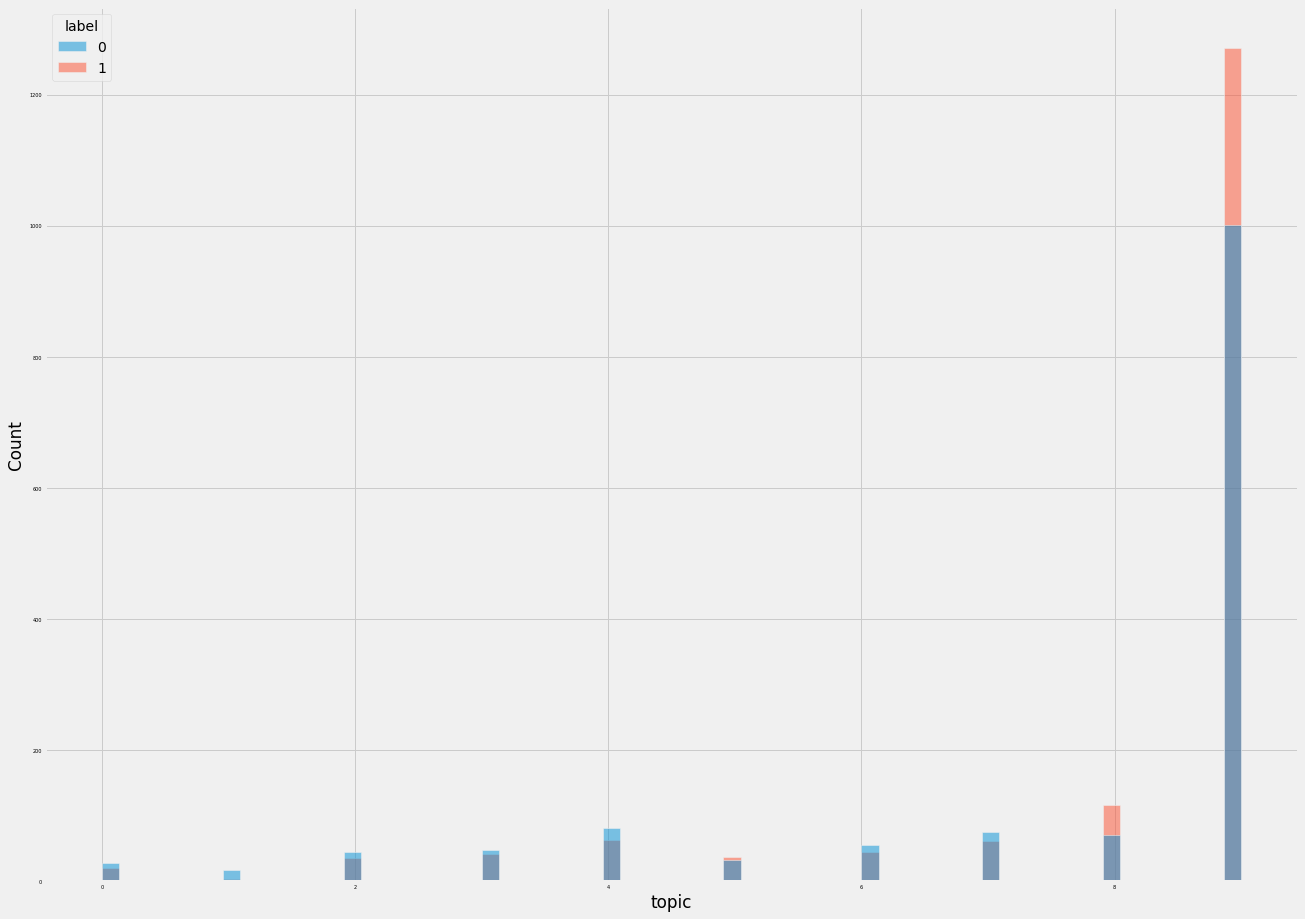

In [587]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,15)

sns.histplot(data = lda_df , x = 'topic' , hue ='label')

In [593]:
topic = lda.get_topic_terms(9)
for idx,prob in topic:
    print(common_dict[idx])

like
alexa
music
great
echo
devices
works
use
smart
home


In [604]:
import pyLDAvis
from collections import defaultdict

In [596]:
phi = lda.get_topics()
phi

array([[3.2636363e-02, 2.1552581e-02, 1.3291708e-03, ..., 4.4427121e-05,
        2.6729605e-05, 3.1244097e-05],
       [1.7777516e-02, 8.1520965e-03, 1.5359040e-03, ..., 4.6020170e-05,
        4.6023401e-05, 1.0175994e-04],
       [8.5791070e-03, 7.2996609e-02, 8.4949034e-04, ..., 5.2972420e-05,
        2.7075568e-05, 2.9116609e-05],
       ...,
       [1.8245948e-02, 3.0988516e-02, 1.5581290e-04, ..., 1.3912353e-04,
        3.0390986e-05, 3.9137278e-05],
       [2.4958964e-02, 3.2945141e-02, 1.8231681e-04, ..., 6.7538596e-05,
        3.5257242e-05, 3.5254812e-05],
       [1.4349610e-02, 7.5661000e-03, 1.4131714e-03, ..., 2.4468018e-05,
        6.3041436e-05, 2.6859045e-05]], dtype=float32)

In [597]:
theta , _ = lda.inference(common_corpus)
theta

array([[ 0.10002327,  0.10001108,  0.10003362, ...,  0.1000206 ,
         0.1000244 ,  0.1000094 ],
       [ 0.10000986,  0.1000108 ,  0.10000591, ...,  0.10000037,
         0.10000044,  0.10001072],
       [ 0.10002594,  0.1000177 ,  2.6956804 , ...,  0.10002945,
         0.10001071, 13.501073  ],
       ...,
       [ 0.10002919,  0.10001323,  0.10002621, ...,  0.10002309,
         7.8361073 , 10.18079   ],
       [ 0.10002758,  0.10001854,  9.81942   , ...,  6.1557455 ,
         0.10002171,  7.4211826 ],
       [ 0.10000399,  1.099912  ,  0.10000345, ...,  0.10000803,
         0.10000486,  0.1000118 ]], dtype=float32)

In [631]:
term_freq=defaultdict(int)

for i in common_corpus:
    for j in i:
#         print(j[0])
        term_freq[j[0]] += j[1]
#         
term_freq

defaultdict(int,
            {0: 826,
             1: 951,
             2: 42,
             3: 107,
             4: 613,
             5: 32,
             6: 19,
             7: 29,
             8: 10,
             9: 133,
             10: 215,
             11: 96,
             12: 501,
             13: 69,
             14: 15,
             15: 25,
             16: 37,
             17: 94,
             18: 15,
             19: 75,
             20: 150,
             21: 29,
             22: 8,
             23: 77,
             24: 525,
             25: 96,
             26: 49,
             27: 215,
             28: 334,
             29: 127,
             30: 163,
             31: 82,
             32: 57,
             33: 96,
             34: 30,
             35: 29,
             36: 26,
             37: 50,
             38: 27,
             39: 20,
             40: 90,
             41: 184,
             42: 49,
             43: 236,
             44: 17,
             45: 106,
            

In [602]:
vocab = common_dict.values()
vocab

ValuesView(<gensim.corpora.dictionary.Dictionary object at 0x000001C0F3BB8BE0>)

In [645]:
viz = pyLDAvis.prepare(topic_term_dists = phi,doc_topic_dists =theta,doc_lengths = range(len(common_corpus)) , vocab = vocab , term_frequency = term_freq.values())

D:\Anaconda\envs\nlp\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [646]:
pyLDAvis.save_html(viz , 'LDA_Amazon.html')